## Brain Stroke Prediction

In [66]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

In [67]:
import cufflinks as cf 
cf.go_offline() 
cf.set_config_file(offline=False, world_readable=True) ## links plotly directly to pandas 

In [68]:
df = pd.read_csv(r'~/Data Files/healthcare-dataset-stroke-data.csv') 

In [69]:
df 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [70]:
df['gender'].value_counts() 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [71]:
df.drop(labels=[3116], axis=0, inplace=True)

In [72]:
df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [73]:
df['bmi'].mean() 

28.894559902200502

In [74]:
df['bmi'] = df['bmi'].replace(np.nan, df['bmi'].mean())

In [75]:
print(df['hypertension'].value_counts()) 
print(df['heart_disease'].value_counts())
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts()) 
print(df['stroke'].value_counts() )

0    4611
1     498
Name: hypertension, dtype: int64
0    4833
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1756
Name: ever_married, dtype: int64
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64
0    4860
1     249
Name: stroke, dtype: int64


In [76]:
# explode = [0.2, 0]
# df[df['stroke'] == 1]['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=explode) 
### This code and the cell below represents same solution ### 

df.to_csv('brain_stroke_df.csv', index=False)

In [77]:
gender = df.groupby(df['gender'])['stroke'].sum() 
df_gender = pd.DataFrame({'labels': gender.index, 'values': gender.values}) 
df_gender.iplot(kind='pie', title='Stroke among gender', labels='labels', values='values', 
                colors=['lightpink', 'skyblue'], pull=[0.1,0]) 

In [78]:
bp = df.groupby(df['hypertension'])['stroke'].sum() 
df_bp = pd.DataFrame({'bp': bp.index, 'values': bp.values}) 
df_bp.iplot(kind='pie', labels='bp', values='values', title='Stroke among BP', 
           colors=['#FCF5E5', 'red'], pull=[0,0.1]) 

In [79]:
married = df.groupby(df['ever_married'])['stroke'].sum() 
df_married = pd.DataFrame({'labels':married.index, 'values': married.values}) 
df_married.iplot(kind='pie', labels='labels', values='values',
                 title='Marital Status Among People with Stroke', 
                 colors=['#e1e505', '#05405d'],pull=[0.1,0], hole=0.3)

In [80]:
residence = df.groupby(df['Residence_type'])['stroke'].sum() 
df_residence = pd.DataFrame({'labels': residence.index, 'values': residence.values}) 
df_residence.iplot(kind='pie', labels='labels', values='values', 
                  title='Residence type among People with Stroke', hole=0.3, 
                   colors=['#530905', '#0aefef'],pull=[0.1,0])

In [81]:
work = df.groupby(df['work_type'])['stroke'].sum() 
df_work = pd.DataFrame({'labels': work.index, 'values': work.values}) 
df_work.iplot(kind='pie', labels='labels', values='values', title='Work type among individuals with Stroke', 
             pull=[0.1,0,0.1,0,0.1])

In [82]:
smoking = df.groupby(df['smoking_status'])['stroke'].sum() 
df_smoking = pd.DataFrame({'labels': smoking.index, 'values': smoking.values}) 
df_smoking.iplot(kind='pie', labels='labels', values='values', title='Smoking type among individuals with Stroke', 
             colors=['#03ca54', '#bff7d8', '#d9bff7', '#bfe2f7'],pull=[0.1,0,0.1,0,0.1])

In [83]:
df.drop('id', axis=1).corr(method='spearman') 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.280624,0.269628,0.145360,0.363453,0.249530
hypertension,0.280624,1.000000,0.108292,0.114108,0.162385,0.127891
heart_disease,0.269628,0.108292,1.000000,0.106408,0.065287,0.134905
avg_glucose_level,0.145360,0.114108,0.106408,1.000000,0.113950,0.082585
bmi,0.363453,0.162385,0.065287,0.113950,1.000000,0.054964
stroke,0.249530,0.127891,0.134905,0.082585,0.054964,1.000000


In [84]:
df.describe() 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [85]:
df_stroke = df[['age', 'gender']][df['stroke'] == 1]
df_stroke['male_age'] = df_stroke['age'][df_stroke['gender'] == 'Male'] 
df_stroke['female_age'] = df_stroke['age'][df_stroke['gender'] == 'Female'] 
df_stroke[['male_age', 'female_age']].iplot(kind='histogram', bins=20, colors=['blue', 'lightpink'], 
                                           title='Ages (Male and Female) - Strokes') 

In [86]:
df 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


In [87]:
df['Residence_type'] = df['Residence_type'].map(lambda x:1 if x == 'Urban' else 0)

In [88]:
df['gender'] = df['gender'].map(lambda x:1 if x=='Male' else 0) 
df['ever_married'] = df['ever_married'].map(lambda x:1 if x=='Yes' else 0)

In [89]:
features = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 
              'avg_glucose_level', 'bmi', 'smoking_status']] 

In [90]:
one_hot = pd.get_dummies(features[['work_type', 'smoking_status']]) 
features_updated = pd.concat([features, one_hot], axis=1) 
features_updated.drop(['work_type', 'smoking_status'], axis=1, inplace=True) 

In [91]:
features_updated.astype('float64') 

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.60000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,61.0,0.0,0.0,1.0,0.0,202.21,28.89456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.40000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1.0,0.0,1.0,1.0,83.75,28.89456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5106,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.60000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,1.0,51.0,0.0,0.0,1.0,0.0,166.29,25.60000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [92]:
features_updated = features_updated.astype('float64')

In [93]:
features_updated.to_csv('brain_stroke_features.csv', index=False) 

In [94]:
features_updated = pd.read_csv('brain_stroke_features.csv')

### Model building 

In [95]:
Y = pd.Series(df['stroke']).to_numpy()   
Y 

array([1, 1, 1, ..., 0, 0, 0])

In [96]:
X = features_updated 

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [98]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No stroke', 'Stroke'])


#### Logistic Regression 

In [99]:
parameters = {'C':[0.01, 0.1, 1], 
              'penalty': ['l2'], 
              'solver': ['liblinear']} 

In [139]:
lr = LogisticRegression() 
logreg = GridSearchCV(lr, parameters, scoring='accuracy', cv=10) 
logreg.fit(X_train, Y_train) 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [140]:
print("Tuned parameters: ", logreg.best_params_) 
logreg.best_score_

Tuned parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


0.7536538461538462

In [141]:
logreg.score(X_test, Y_test)

0.74

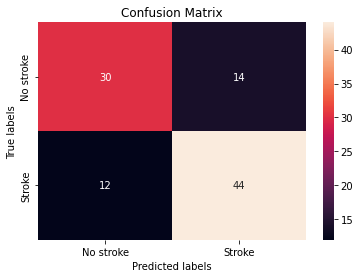

In [142]:
yhat = logreg.predict(X_test) 
plot_confusion_matrix(Y_test, yhat) 

#### Decision Tree 

In [104]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 

In [105]:
undersample = RandomUnderSampler(sampling_strategy='majority')  

In [106]:
oversample = RandomOverSampler(sampling_strategy=0.5) 

In [123]:
X_over, y_over = undersample.fit_resample(X, Y)

In [124]:
unique, counts = np.unique(y_over, return_counts=True)
dict(zip(unique, counts))

{0: 249, 1: 249}

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=2)

In [126]:
parameters1 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier() 

In [127]:
tree_cv = GridSearchCV(tree, parameters1, cv=10, scoring='accuracy') 
tree_cv = tree_cv.fit(X_train, Y_train) 


In [128]:
tree_cv.score(X_test, Y_test)

0.64

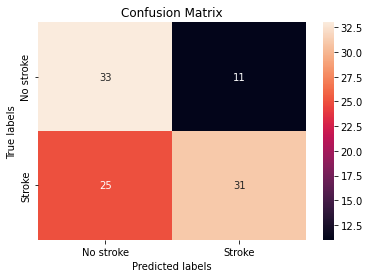

In [129]:
yhat = tree_cv.predict(X_test) 
plot_confusion_matrix(Y_test, yhat) 

In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65        44
           1       0.74      0.55      0.63        56

    accuracy                           0.64       100
   macro avg       0.65      0.65      0.64       100
weighted avg       0.66      0.64      0.64       100



In [132]:
kf=KFold(n_splits=5)
score=cross_val_score(tree_cv,X_over,y_over,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))  

Cross Validation Scores are [0.59       0.59       0.62       0.4040404  0.57575758]
Average Cross Validation score :0.5559595959595959


### Deep Learning 

In [133]:
X_train.shape

(398, 17)

In [134]:
from tensorflow import keras 
from tensorflow.keras import layers  

In [135]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[17]),
    layers.Dense(4, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
    
])

In [136]:
model.compile(
        optimizer='adam',
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)

In [137]:
early_stopping = keras.callbacks.EarlyStopping(patience =10, 
                                              min_delta=0.001, 
                                              restore_best_weights=True,
                                              ) 

history = model.fit(X_train, Y_train, 
                   validation_data=(X_test, Y_test), 
                   batch_size=512,
                   epochs=1000,
                   callbacks=[early_stopping],
                    verbose=0
                   )

Best Validation Loss: 0.6366
Best Validation Accuracy: 0.7000


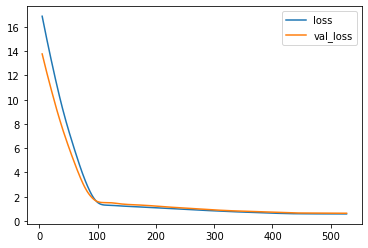

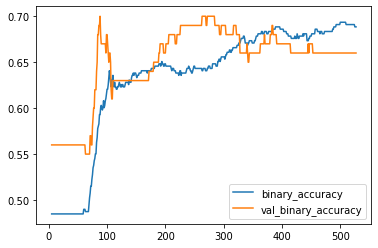

In [138]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))